# Bank Churn Prediction

## Description
### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### Data Dictionary

* **CustomerId**: Unique ID which is assigned to each customer
* **Surname**: Last name of the customer 
* **CreditScore**: It defines the credit history of the customer.  
* **Geography**: A customer’s location    
* **Gender**: It defines the Gender of the customer   
* **Age**: Age of the customer     
* **Tenure**: Number of years for which the customer has been with the bank
* **NumOfProducts**: It refers to the number of products that a customer has purchased through the bank.
* **Balance**: Account balance
* **HasCrCard**: It is a categorical variable that decides whether the customer has a credit card or not.
* **EstimatedSalary**: Estimated salary 
* **isActiveMember**: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* **Excited**: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    **0=No ( Customer did not leave the bank )**
                    **1=Yes ( Customer left the bank )**

### Loading Libraries

In [3]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To help with model building
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# To get different metric scores
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically
#!pip install nb-black
#%load_ext nb_black

In [4]:
#pip install nb-black

### Load data

In [5]:
#Defining the path of the dataset
dataset_file = 'Churn_Modelling.csv'

In [6]:
#reading dataset
data = pd.read_csv(dataset_file)

### View the first and last 5 rows of the dataset.

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


* Data is fairly clean
* Target Variable is Excited and CustomerID is the Primary Key
* Further analysis required

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* Shape - 10000*14 
* No missing values observed
* Datatypes seem fine
* Need to see unique values to identify hidden missing values

### Checking for Duplicate records

In [10]:
data.duplicated().sum()

0

* No duplicate records found

### Checking for Duplicates in CustomerID

In [11]:
dupe = data["CustomerId"].duplicated()
dupe[dupe == True].count()

0

* No Duplicates found

### checking unique values counts in the Object variables

In [12]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        print(data[feature].value_counts())
        print("-" * 30)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------


* No hidden missing/invalid values found
* Surname has too many values and does not look like a relevant variable for the model building. Will be dropped from training dataset during the split

### Summary of the dataset

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


1. *CustomerId* is the Primary key with no missing values
2. *CreditScore* ranges from 350 to 718, with mean around 651. Since mean and median are very close, this seems like a normal distribution
3. *Age* ranges from 18 to 92, with mean around 39. Since mean and median are very close, this seems like a normal distribution
4. *Tenure* ranges from 0 to 10, with mean around 5. Since mean and median are same, this seems like a normal distribution
5. *Balance* ranges from 0 to 251k, with mean around 76.5k. Std Deviation is high, depicting a skewed distribution
6. *NumOfProducts* ranges from 1 to 4, with mean around 2. Data seems slighly skewed. Need to see the distribution to know more
7. *HasCrCard* has values 0 or 1, more than 50% customers having 1 card
8. *IsActiveMember* has values 0 or 1, with 50% customers having 1 card
9. *EstimatedSalary* ranges from 12 to 200k, with mean around 100k. Since mean and median are very close, this seems like a normal distribution.
10. *Exited* has values 0 or 1, and most customers are exited

## EDA

### Univariate Analysis

In [14]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### CreditScore

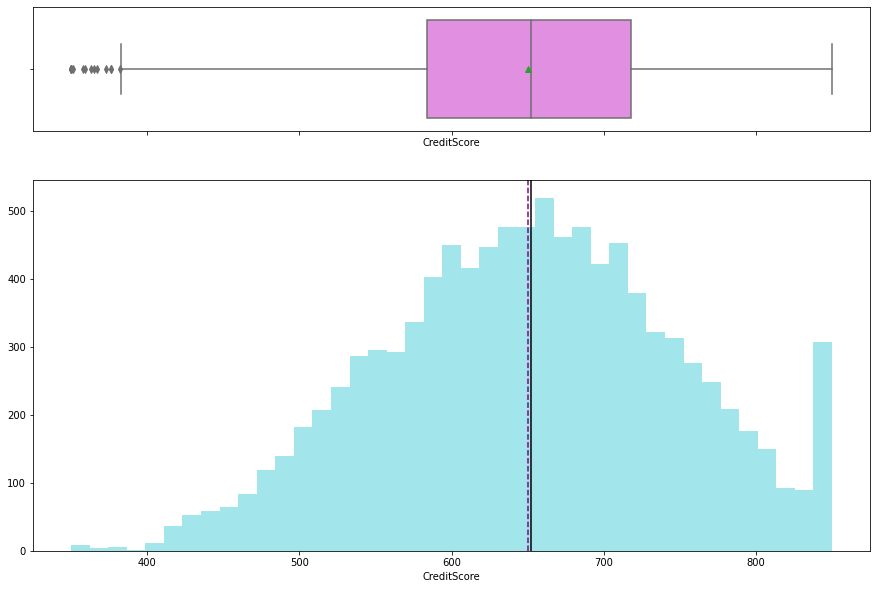

In [15]:
histogram_boxplot(data.CreditScore)

* Normal distribution, with few outliers towards the left. Small peaks at the right end

### Age

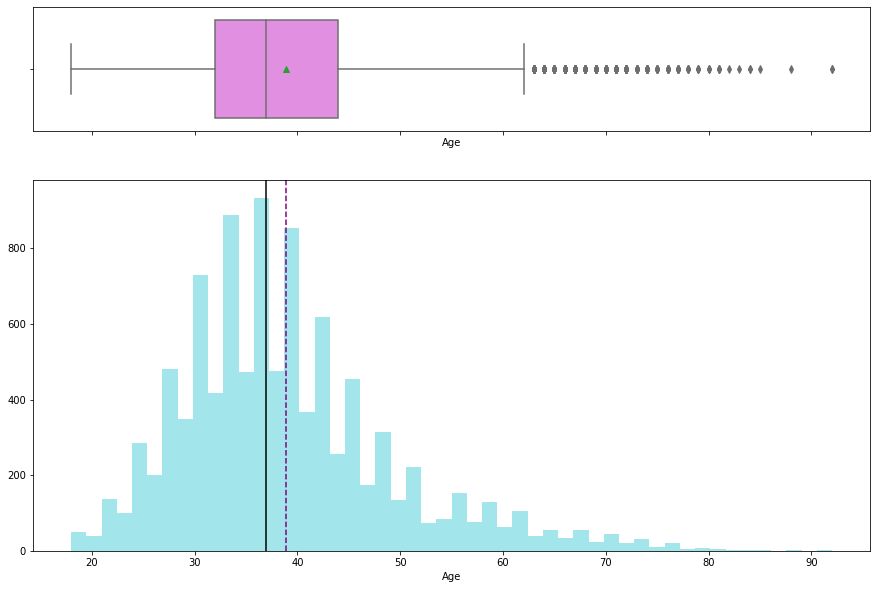

In [16]:
histogram_boxplot(data.Age)

* Age is right skewed

### Balance

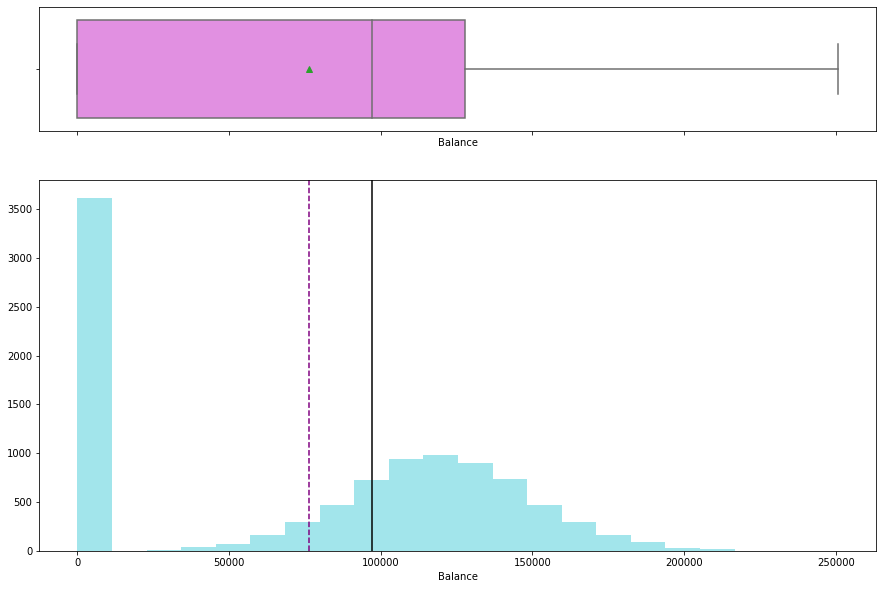

In [17]:
histogram_boxplot(data.Balance)

* Normal distribution, except a peak in the left, causing the skewness

### EstimatedSalary

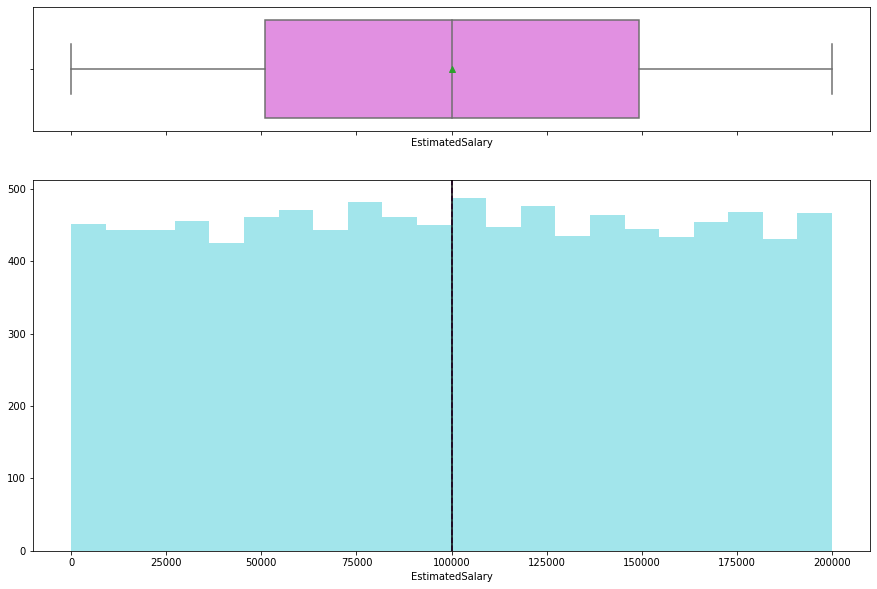

In [18]:
histogram_boxplot(data.EstimatedSalary)

* Similar frequency of all salary buckets.

In [19]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(z):
    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    # plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

### Exited(Target Variable)

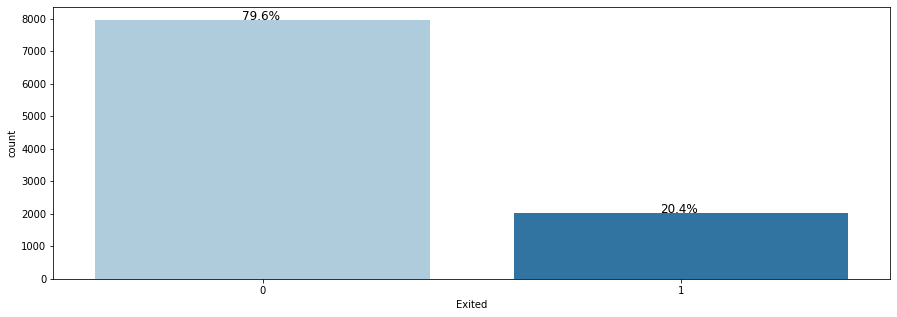

In [20]:
perc_on_bar("Exited")

* Imbalanced variable. Model is likely to be biased towards value 0

### Tenure

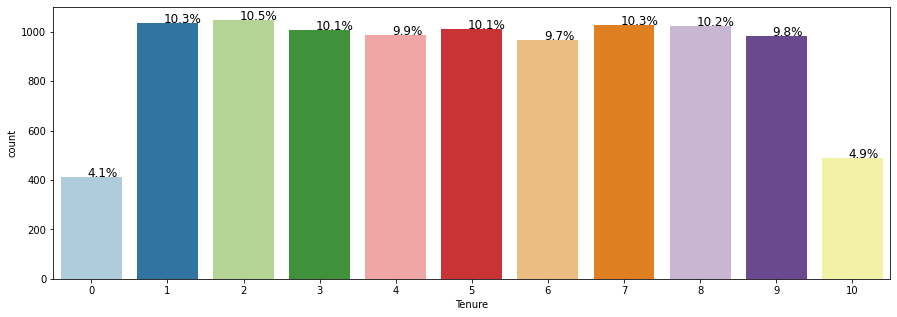

In [21]:
perc_on_bar("Tenure")

* Almost similar distribution across all tenures, except 0 and 10

### NumOfProducts

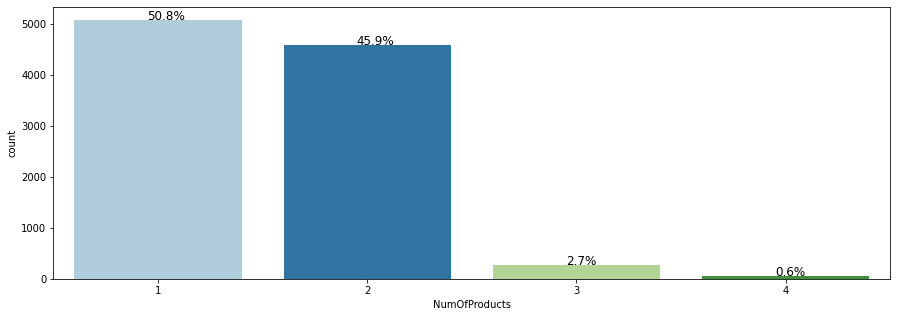

In [22]:
perc_on_bar("NumOfProducts")

* Most customers have either 1 or 2 products

### HasCrCard

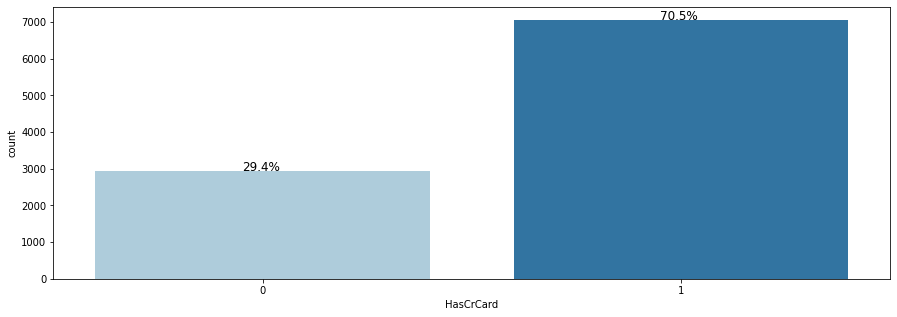

In [23]:
perc_on_bar("HasCrCard")

* over 70% customers have a credit card

### IsActiveMember

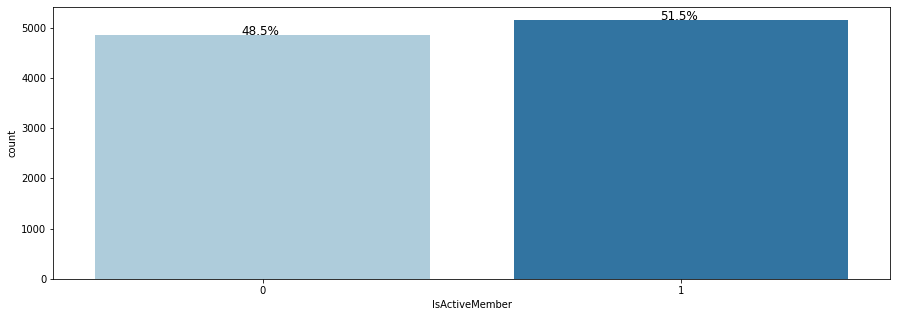

In [24]:
perc_on_bar("IsActiveMember")

* over 50% customers are active customers

## Bivariate analysis

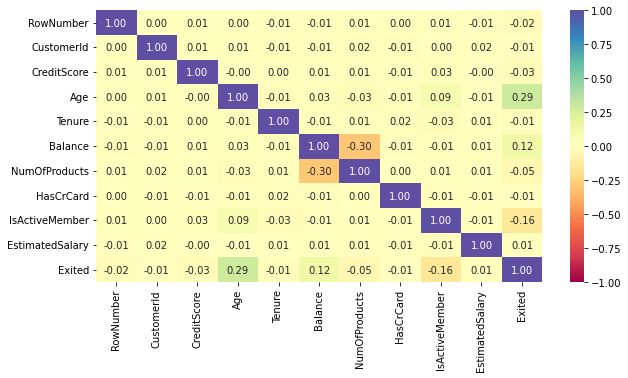

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Variables are independent. No correlation seen, even for the target variable

### To see distribution of target across the variables

In [26]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["Exited"], margins=True).sort_values(
        by=0, ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["Exited"], normalize="index").sort_values(
        by=0, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Tenure                   
All     7963  2037  10000
7        851   177   1028
2        847   201   1048
8        828   197   1025
1        803   232   1035
5        803   209   1012
3        796   213   1009
4        786   203    989
6        771   196    967
9        771   213    984
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


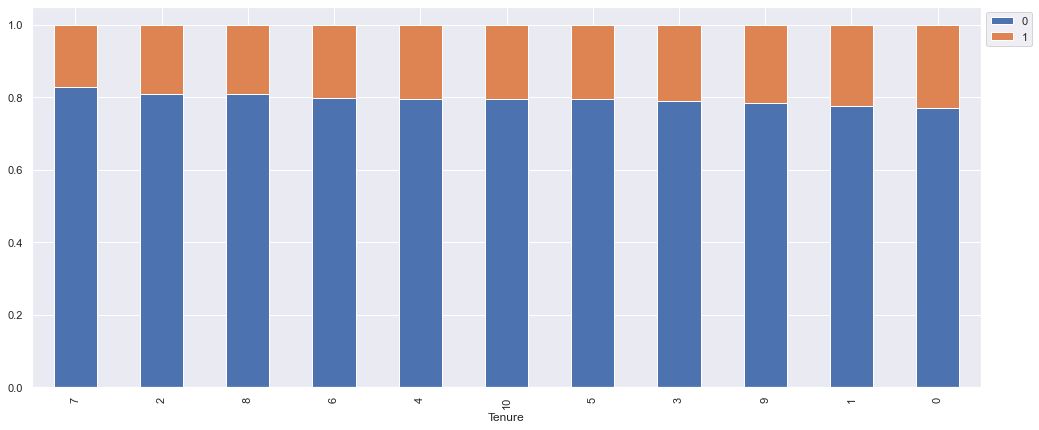

In [27]:
stacked_plot(data["Tenure"])

* Similar distribution of target across all the tenures

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
2              4242   348   4590
1              3675  1409   5084
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


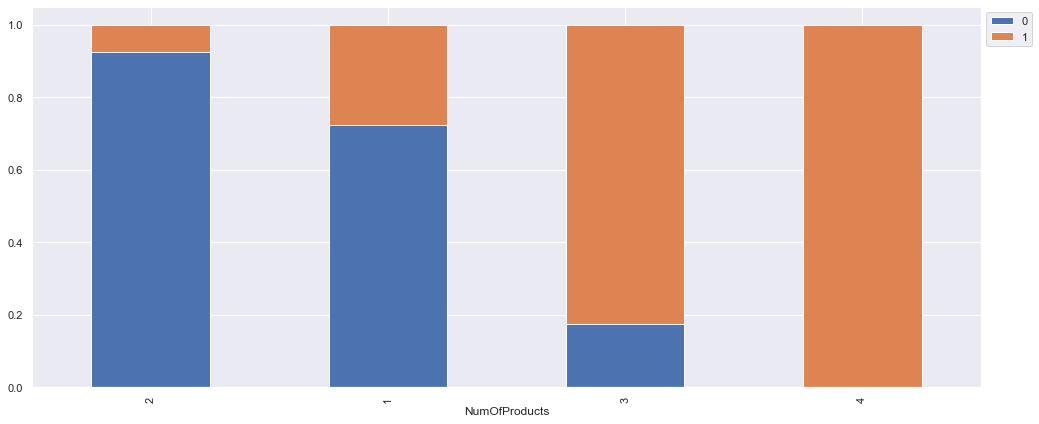

In [28]:
stacked_plot(data["NumOfProducts"])

* Since over 96% customers have either 1 or 2 products, above trend shows single product holding customers churn more

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


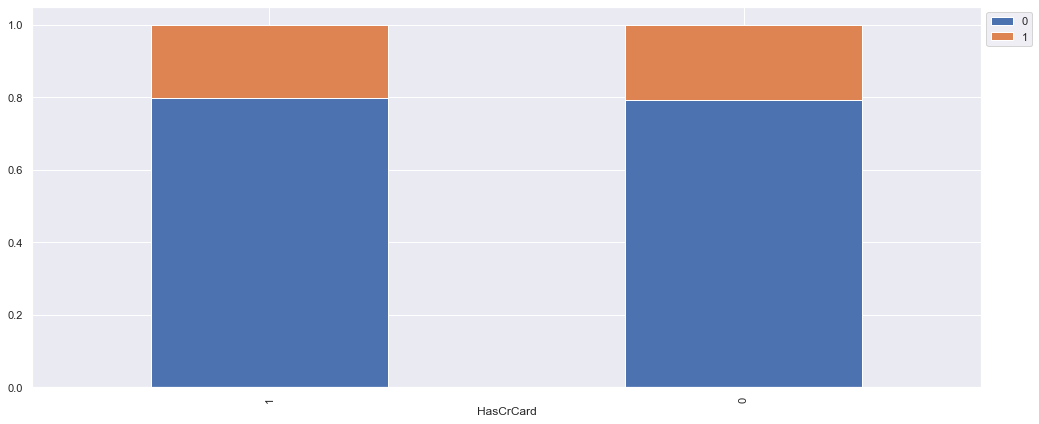

In [29]:
stacked_plot(data["HasCrCard"])

* Similar distribution of the target variable across the HasCrCard variable

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
1               4416   735   5151
0               3547  1302   4849
------------------------------------------------------------------------------------------------------------------------


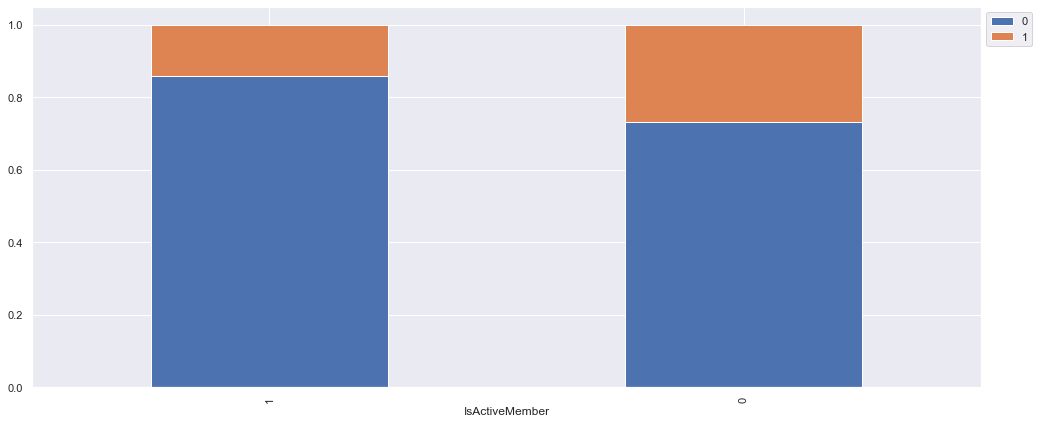

In [30]:
stacked_plot(data["IsActiveMember"])

* Active customers churn less than dormant customers

In [31]:
### Function to plot distributions and Boxplots of customers
def plot(x, target="Exited"):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].set_title(
        f"Distribution of {x} of people who attrited", fontsize=12, fontweight="bold"
    )
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0, 0], color="teal")
    axs[0, 1].set_title(
        f"Distribution of {x} of people who did not attrite",
        fontsize=12,
        fontweight="bold",
    )
    sns.distplot(data[(data[target] == 0)][x], ax=axs[0, 1], color="orange")
    axs[1, 0].set_title(
        f"Boxplot of {x} w.r.t Exited", fontsize=12, fontweight="bold"
    )

    line = plt.Line2D(
        (0.1, 0.9), (0.5, 0.5), color="grey", linewidth=1.5, linestyle="--"
    )
    fig.add_artist(line)

    sns.boxplot(
        data[target], data[x], ax=axs[1, 0], palette="gist_rainbow", showmeans=True
    )
    axs[1, 1].set_title(
        f"Boxplot of {x} w.r.t Exited - Without outliers",
        fontsize=12,
        fontweight="bold",
    )
    sns.boxplot(
        data[target],
        data[x],
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        showmeans=True,
    )  # turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

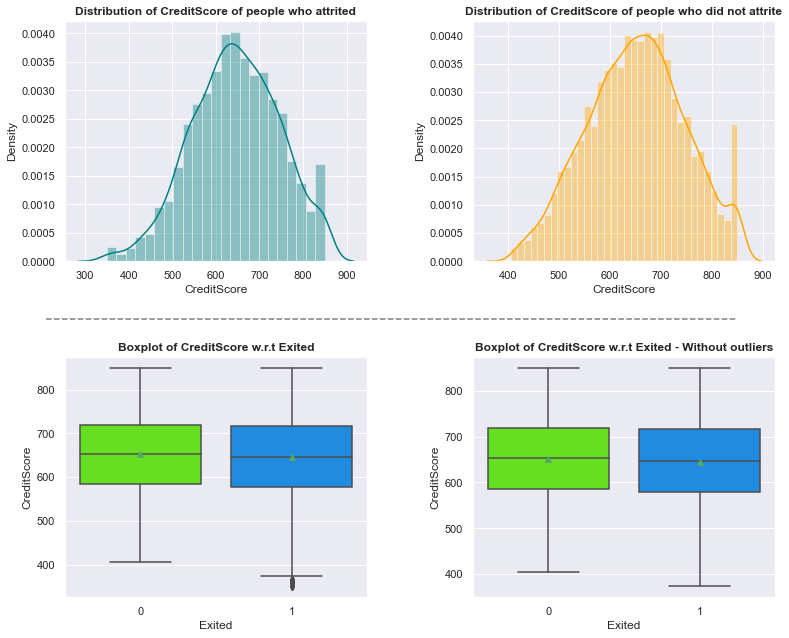

In [32]:
plot("CreditScore")

* On an average similar Credit Score for both attrited and existing customers

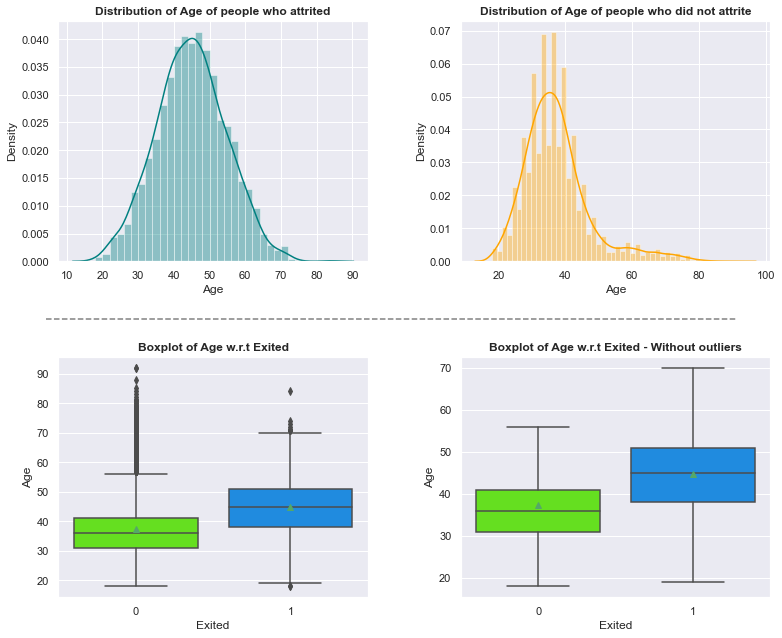

In [33]:
plot("Age")

* Attrited customers are older than the existing customers

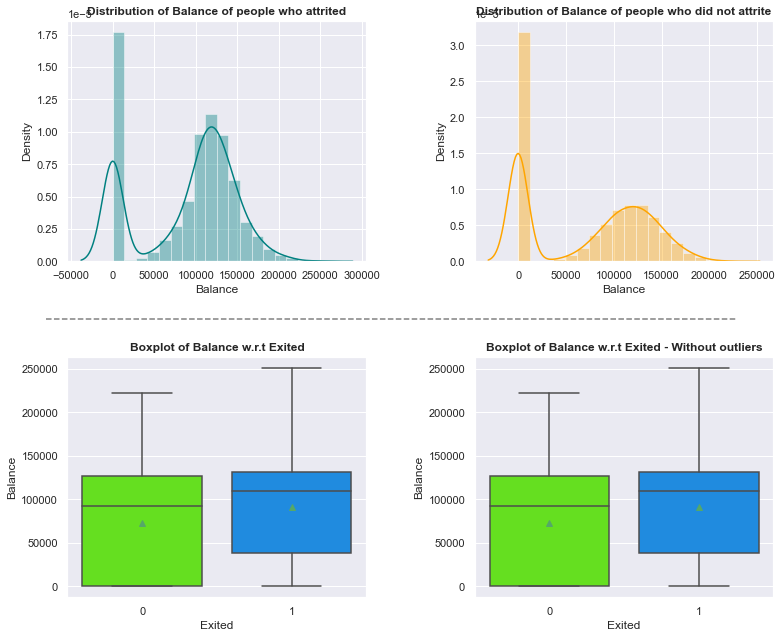

In [34]:
plot("Balance")

* Higher Balance customers are exiting more than the lower balance customers. Probably takeovers by other banks.

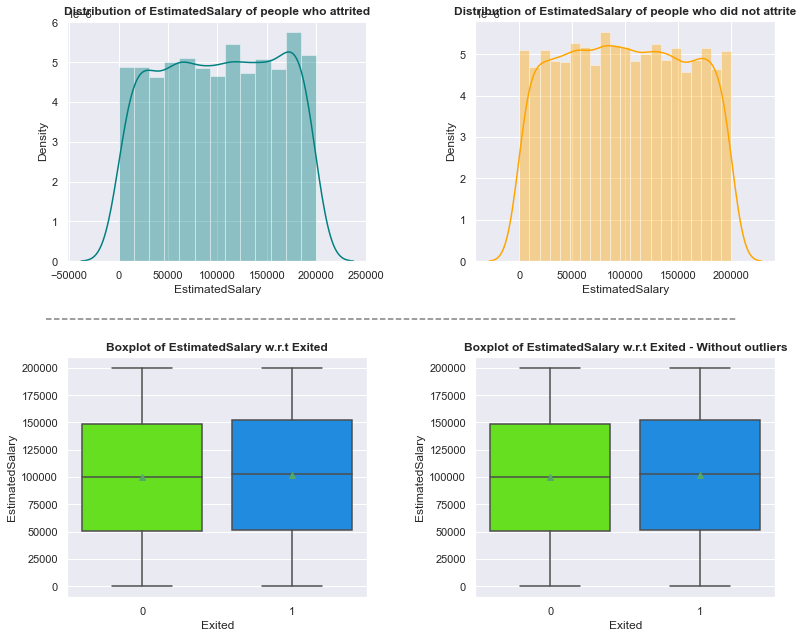

In [35]:
plot("EstimatedSalary")

* Similar trend of the target variable across various salary buckets

### Transforming Skewed Variables

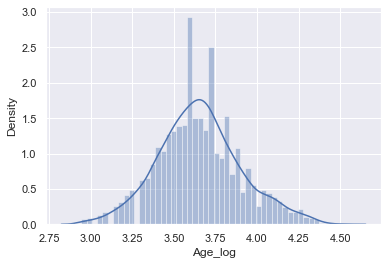

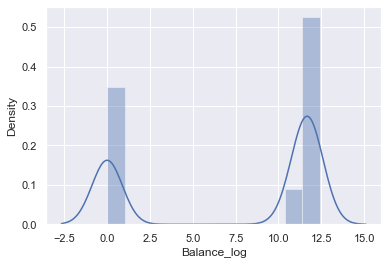

In [36]:
dist_cols = [
    "Age",
    "Balance",
]

for col in dist_cols:
    data[col + "_log"] = np.log(data[col] + 1)
    sns.distplot(data[col + "_log"])
    plt.show()



* Age has normalised, but Balance variable had a better distribution in the original variable

In [37]:
# dropping the original columns
data.drop("Age", axis=1, inplace=True)
data.drop("Balance_log", axis=1, inplace=True)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log
0,1,15634602,Hargrave,619,France,Female,2,0.000,1,1,1,101348.880,1,3.761
1,2,15647311,Hill,608,Spain,Female,1,83807.860,1,0,1,112542.580,0,3.738
2,3,15619304,Onio,502,France,Female,8,159660.800,3,1,0,113931.570,1,3.761
3,4,15701354,Boni,699,France,Female,1,0.000,2,0,0,93826.630,0,3.689
4,5,15737888,Mitchell,850,Spain,Female,2,125510.820,1,1,1,79084.100,0,3.784


### Encoding Categorical variables

In [38]:
oneHotCols = ["Geography", "Gender","Tenure","NumOfProducts"]

data = pd.get_dummies(data, columns=oneHotCols, drop_first=True)
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,15634602,Hargrave,619,0.000,1,1,101348.880,1,3.761,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,83807.860,0,1,112542.580,0,3.738,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,159660.800,1,0,113931.570,1,3.761,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,15701354,Boni,699,0.000,0,0,93826.630,0,3.689,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,5,15737888,Mitchell,850,125510.820,1,1,79084.100,0,3.784,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,6,15574012,Chu,645,113755.780,1,0,149756.710,1,3.807,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
6,7,15592531,Bartlett,822,0.000,1,1,10062.800,0,3.932,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
7,8,15656148,Obinna,376,115046.740,1,0,119346.880,1,3.401,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,9,15792365,He,501,142051.070,0,1,74940.500,0,3.807,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
9,10,15592389,H?,684,134603.880,1,1,71725.730,0,3.332,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Age_log            10000 non-null  float64
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
 13  Tenure_1           10000 non-null  uint8  
 14  Tenure_2           10000 non-null  uint8  
 15  Tenure_3           10000 non-null  uint8  
 16  Tenure_4           1000

### Splitting Data into Training, Validation and Test Set

In [40]:
data1 = data.copy()

# Separating target variable and other variables
X_data = data1.drop(columns=["CustomerId","Exited", "Surname", "RowNumber"])
Y_data = data1["Exited"]

X_data.head()

,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Age_log,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0.000,1,1,101348.880,3.761,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,608,83807.860,0,1,112542.580,3.738,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,502,159660.800,1,0,113931.570,3.761,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,699,0.000,0,0,93826.630,3.689,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,850,125510.820,1,1,79084.100,3.784,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Rescaling the data

In [41]:
from sklearn.preprocessing import StandardScaler

# Normalize in [-1,+1] range

Scale_cols = ["CreditScore","Age_log","Balance","EstimatedSalary"]

for col in Scale_cols:
    X_data['normalized'+col] = StandardScaler().fit_transform(X_data[col].values.reshape(-1,1))  
    X_data= X_data.drop(col,axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, Y_data, test_size=0.25, random_state=1, stratify=Y_data
)
print(X_train.shape, X_test.shape)

(7500, 22) (2500, 22)


In [43]:
X_train.head()

,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,normalizedCreditScore,normalizedAge_log,normalizedBalance,normalizedEstimatedSalary
7971,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.181,0.423,-1.226,-0.360
9152,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.595,-1.894,-0.081,0.063
6732,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1.061,-0.068,-1.226,-0.036
902,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.057,0.942,0.226,0.853
2996,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.812,0.691,0.234,-0.504


### Creating a model

In [44]:
#initialize the model
model = Sequential()

### Adding layers [layers and activations]

In [45]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=22, input_dim = 22,activation='relu'))   # input of 22 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
# model.add(Dense(24,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification fraudulent or not

### Model compile [optimizers and loss functions]

In [46]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                506       
                                                                 
 dense_1 (Dense)             (None, 24)                552       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


## Training [Forward pass and Backpropagation]

In [48]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=200,epochs=20,validation_split=0.2)

Epoch 1/20
30/30 [==============================] - 3s 24ms/step - loss: 0.6020 - accuracy: 0.7582 - val_loss: 0.5551 - val_accuracy: 0.7900
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.5278 - accuracy: 0.7978 - val_loss: 0.4984 - val_accuracy: 0.7900
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4835 - accuracy: 0.7978 - val_loss: 0.4623 - val_accuracy: 0.7900
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4606 - accuracy: 0.7985 - val_loss: 0.4403 - val_accuracy: 0.7907
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4449 - accuracy: 0.8008 - val_loss: 0.4233 - val_accuracy: 0.8027
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4262 - accuracy: 0.8058 - val_loss: 0.4112 - val_accuracy: 0.8147
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4156 - accuracy: 0.8125 - val_loss: 0.4004 - val_accuracy: 0.8240
Epoch 8/20
30/30 [=

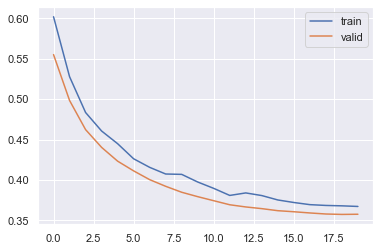

In [49]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Evaluation

In [50]:
score1 = model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.3811 - accuracy: 0.8448


In [51]:
yprednn1=model.predict(X_test)
yprednn1=yprednn1.round()
print('Neural Network with relu:\n {}\n'.format(
    metrics.classification_report(yprednn1, y_test)))

79/79 [==============================] - 1s 3ms/step
Neural Network with relu:
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      2203
         1.0       0.41      0.70      0.52       297

    accuracy                           0.84      2500
   macro avg       0.68      0.78      0.71      2500
weighted avg       0.89      0.84      0.86      2500




### Using sigmoid activation function to see if performance improves

In [52]:
#initialize the model
model_sig = Sequential()

In [53]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_sig.add(Dense(units=22, input_dim = 22,activation='sigmoid'))   # input of 22 columns as shown above
# hidden layer
model_sig.add(Dense(units=24,activation='sigmoid'))
#Adding Dropout to prevent overfitting 
model_sig.add(Dropout(0.5))
model_sig.add(Dense(20,activation='sigmoid'))
# model.add(Dense(24,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model_sig.add(Dense(1,activation='sigmoid'))                        # binary classification fraudulent or not

In [54]:
# Create optimizer with default learning rate
# Compile the model
model_sig.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model_sig.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 22)                506       
                                                                 
 dense_5 (Dense)             (None, 24)                552       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                500       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


In [56]:

#fitting the model
history_sig=model_sig.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 5s 6ms/step - loss: 0.5186 - accuracy: 0.7832 - val_loss: 0.5035 - val_accuracy: 0.7900
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.4799 - accuracy: 0.7978 - val_loss: 0.4482 - val_accuracy: 0.7900
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.4232 - accuracy: 0.8063 - val_loss: 0.3904 - val_accuracy: 0.8193
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3948 - accuracy: 0.8263 - val_loss: 0.3752 - val_accuracy: 0.8280
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3881 - accuracy: 0.8277 - val_loss: 0.3682 - val_accuracy: 0.8400
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3831 - accuracy: 0.8325 - val_loss: 0.3644 - val_accuracy: 0.8387
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3795 - accuracy: 0.8357 - val_loss: 0.3625 - val_accuracy: 0.8380
Epoch 

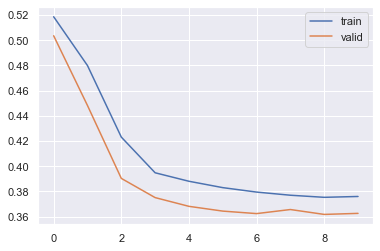

In [57]:
# Capturing learning history per epoch
hist_sig  = pd.DataFrame(history_sig.history)
hist_sig['epoch'] = history_sig.epoch

# Plotting accuracy at different epochs
plt.plot(hist_sig['loss'])
plt.plot(hist_sig['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [58]:
score2 = model_sig.evaluate(X_test, y_test)

79/79 [==============================] - 1s 4ms/step - loss: 0.3913 - accuracy: 0.8396


In [59]:
yprednn2=model_sig.predict(X_test)
yprednn2=yprednn2.round()
print('Neural Network with relu:\n {}\n'.format(
    metrics.classification_report(yprednn2, y_test)))

79/79 [==============================] - 0s 3ms/step
Neural Network with relu:
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.90      2222
         1.0       0.38      0.69      0.49       278

    accuracy                           0.84      2500
   macro avg       0.67      0.78      0.70      2500
weighted avg       0.89      0.84      0.86      2500




* No Improvement in performance

* Performance still the same

### Using tanh function for improving performance

In [60]:
#initialize the model
model_tanh = Sequential()

In [61]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_tanh.add(Dense(units=30, input_dim = 22,activation='tanh'))   # input of 22 columns as shown above
# hidden layer
model_tanh.add(Dense(units=30,activation='tanh'))
#Adding Dropout to prevent overfitting 
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(20,activation='tanh'))
# model.add(Dense(24,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model_tanh.add(Dense(1,activation='sigmoid'))                        # binary classification exited or not

In [62]:
# Create optimizer with default learning rate
# Compile the model
model_tanh.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
model_tanh.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                690       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
_________________________________________________________________


In [64]:
#fitting the model
history_tanh=model_tanh.fit(X_train,y_train,batch_size=200,epochs=20,validation_split=0.2)

Epoch 1/20
30/30 [==============================] - 3s 23ms/step - loss: 0.5866 - accuracy: 0.6882 - val_loss: 0.4483 - val_accuracy: 0.7967
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4546 - accuracy: 0.7967 - val_loss: 0.4130 - val_accuracy: 0.8107
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4259 - accuracy: 0.8073 - val_loss: 0.3902 - val_accuracy: 0.8227
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4012 - accuracy: 0.8207 - val_loss: 0.3755 - val_accuracy: 0.8347
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3879 - accuracy: 0.8287 - val_loss: 0.3684 - val_accuracy: 0.8380
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3875 - accuracy: 0.8338 - val_loss: 0.3658 - val_accuracy: 0.8407
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3831 - accuracy: 0.8375 - val_loss: 0.3623 - val_accuracy: 0.8427
Epoch 8/20
30/30 [=

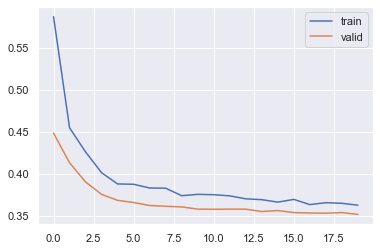

In [65]:
# Capturing learning history per epoch
hist_tanh  = pd.DataFrame(history_tanh.history)
hist_tanh['epoch'] = history_tanh.epoch

# Plotting accuracy at different epochs
plt.plot(hist_tanh['loss'])
plt.plot(hist_tanh['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [66]:
score3 = model_tanh.evaluate(X_test, y_test)

79/79 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8492


In [67]:
yprednn3=model_tanh.predict(X_test)
yprednn3=yprednn3.round()
print('Neural Network with tanh:\n {}\n'.format(
    metrics.classification_report(yprednn3, y_test)))

79/79 [==============================] - 0s 3ms/step
Neural Network with tanh:
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      2178
         1.0       0.45      0.70      0.55       322

    accuracy                           0.85      2500
   macro avg       0.70      0.79      0.73      2500
weighted avg       0.89      0.85      0.86      2500




* performance with tanh activation is slightly better than sigmoid, still close to Relu

### Goping ahead with Relu version of neural network

### ROC-AUC Curve

In [68]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [69]:
# calculate the fpr and tpr for all thresholds of the classification
preds = model.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

79/79 [==============================] - 0s 3ms/step


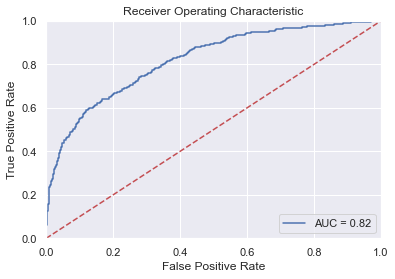

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


* The optimal threshold can be seen around 0.4

In [71]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

79/79 [==============================] - 0s 3ms/step


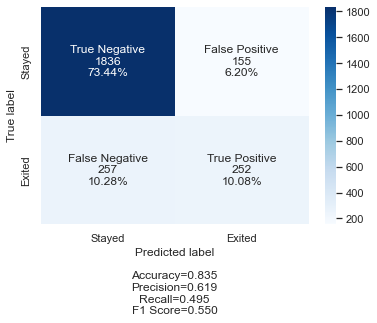

In [72]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.4:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Stayed','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Conclusion and Key Takeaways

Though it is very difficult to derive insights from the neural network, let us try and understand the same from the EDA done, to understand where the areas of focus should be for the business

1. Try to cross sell more products to improve customer stickiness, as single product holder are shown to be more likely to churn
2. Run campaigns to increase customer spends, and keeping them engaged/active
3. Try to use dedicated RMs and give better service to high balance customers, maybe create an elite segment to retain them